In [6]:
!pip install ucimlrepo
!pip install pandas
!pip install matplotlib
!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

#### Task 1: Load and Explore the Dataset
Load the dataset using pandas:

You can use pandas to load the dataset from the provided CSV URL

In [8]:
import pandas as pd

# Load the dataset from the UCI repository
data_url = 'https://archive.ics.uci.edu/static/public/2/data.csv'
adult_df = pd.read_csv(data_url)

# Display the first few rows of the dataset to inspect the data
print(adult_df.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

2. Explore the structure of the dataset:


In [9]:
# Check data types and missing values
print(adult_df.info())

# Check for missing values
print(adult_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
age                 0
workclass         963
fnlwgt              0
education           0


3. Clean the dataset by handling missing values:

In [10]:
# Option 1: Drop rows with missing values
adult_df_cleaned = adult_df.dropna()

# Option 2: Fill missing values (for example, with the mode for categorical columns)
adult_df_cleaned = adult_df.fillna(adult_df.mode().iloc[0])

# Verify no missing values remain
print(adult_df_cleaned.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


#### Task 2: Basic Data Analysis
Compute basic statistics of the numerical columns:

In [11]:
# Compute basic statistics for numerical columns
print(adult_df_cleaned.describe())


                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


2. Perform groupings on a categorical column and compute the mean of a numerical column:



In [12]:
# Group by 'education' and calculate the mean of 'hours-per-week'
education_hours = adult_df_cleaned.groupby('education')['hours-per-week'].mean()

# Display the result
print(education_hours)


education
10th            36.986321
11th            33.952539
12th            35.374429
1st-4th         38.761134
5th-6th         38.923379
7th-8th         39.003141
9th             38.359788
Assoc-acdm      40.809494
Assoc-voc       41.658418
Bachelors       42.482492
Doctorate       46.582492
HS-grad         40.640775
Masters         43.575837
Preschool       36.566265
Prof-school     47.579137
Some-college    38.865784
Name: hours-per-week, dtype: float64


#### Task 3: Data Visualization

### Line chart (Trends over time):

If you have a time-related column, such as "year", you can plot trends over time. Since this dataset does not have a direct time variable, you can skip this step or assume a hypothetical time-based analysis.

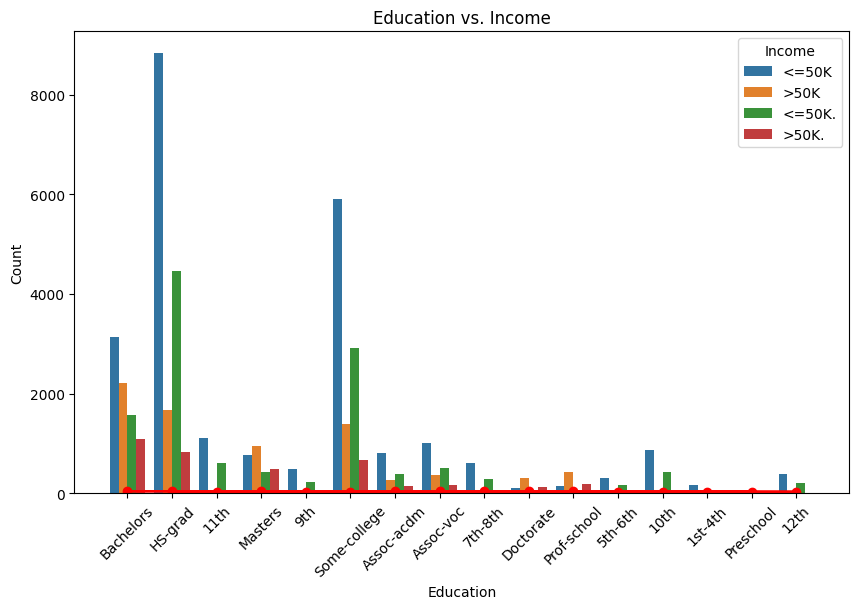

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))

# Create a count plot of 'education' with the color hue defined by 'income'
sns.countplot(data=adult_df_cleaned, x='education', hue='income')


/tmp/ipykernel_3463/1126677060.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Income', loc='upper right')


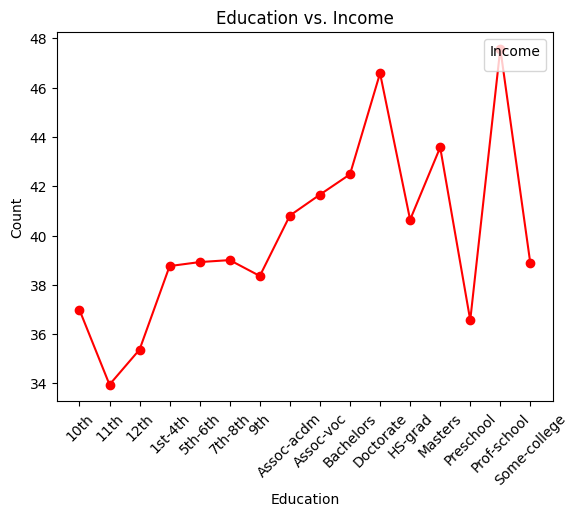

In [22]:
# line graph
plt.plot(education_hours, color='red', marker='o')
plt.title('Education vs. Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()


Bar chart (Comparison of a numerical value across categories):

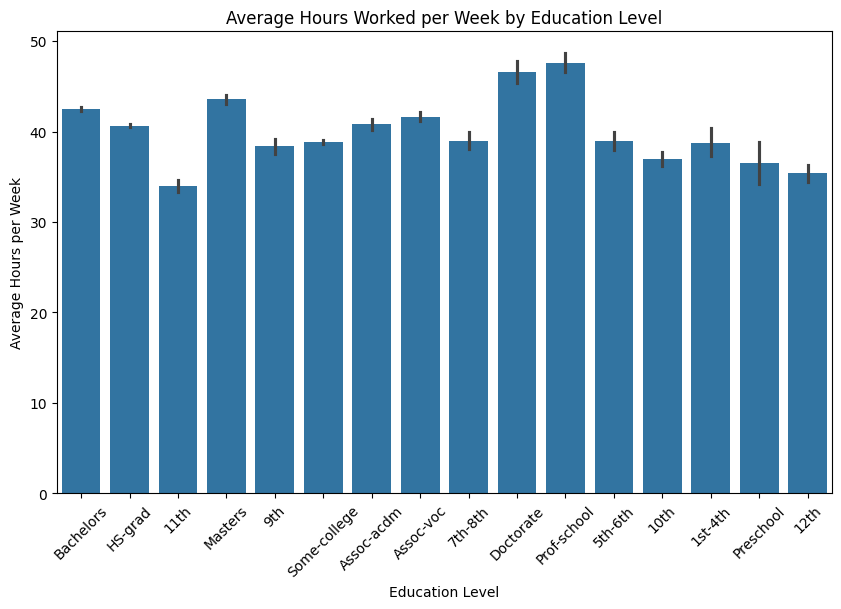

In [13]:


# Create a bar chart for hours worked per week based on education level
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='hours-per-week', data=adult_df_cleaned)
plt.title('Average Hours Worked per Week by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Hours per Week')
plt.xticks(rotation=45)
plt.show()


3. Histogram (Distribution of a numerical column):


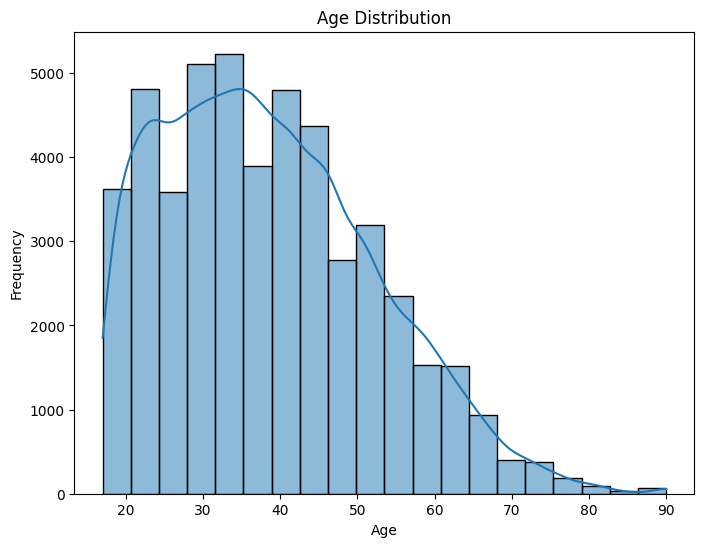

In [14]:
# Create a histogram for age distribution
plt.figure(figsize=(8, 6))
sns.histplot(adult_df_cleaned['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


4 Scatter plot (Relationship between two numerical columns)

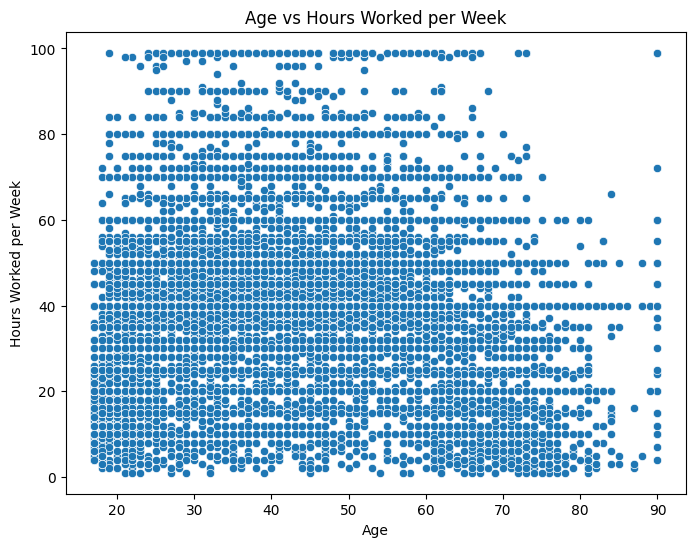

In [15]:
# Create a scatter plot for age vs hours worked per week
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='hours-per-week', data=adult_df_cleaned)
plt.title('Age vs Hours Worked per Week')
plt.xlabel('Age')
plt.ylabel('Hours Worked per Week')
plt.show()


### Error Handling
To handle potential errors (e.g., file not found, missing data, incorrect data types), wrap your code in a try-except block:

In [16]:
try:
    # Try to load the dataset
    adult_df = pd.read_csv(data_url)
    print(adult_df.head())
except FileNotFoundError:
    print("The file was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             